MAD Graphs for Patient 11

In [39]:
# Import Modules
import sys
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import matplotlib.lines as mlines
from scipy.io import loadmat

from Modules import Actigraph_Metrics

In [40]:
# signal parameters
freq = 100 #signal is 100hz

Define Functions

In [41]:
def sbs_boxplot(sbs, x_mag, window_size=100, show_outlier=True):
    # Output Boxplot for each SBS Score
    sbs_mad_dict = {-1: [], 0: [], 1: [], 2: []}

    # Populate the dictionary with MAD values
    for i, sbs_value in enumerate(sbs):    
        signal = Actigraph_Metrics.VecMag_MAD(x_mag[i,:], window_size)
        sbs_mad_dict[sbs_value].extend(signal)

    fig, ax = plt.subplots()
    # Box plot: this version will show the outliers too
    ax.boxplot([sbs_mad_dict[-1], sbs_mad_dict[0], sbs_mad_dict[1], sbs_mad_dict[2]], labels=['-1', '0', '1', '2'], showfliers=show_outlier)
    ax.set_xlabel('SBS Score')
    ax.set_ylabel('MAD')
    return ax, sbs_mad_dict


def report_quartiles(sbs_mad_dict):
    # print quartiles and 90th percentile
    quartiles = {}
    for sbs_value, mad_list in sbs_mad_dict.items():
        if mad_list:  # Check if the list is not empty
            quartiles[sbs_value] = {
                'Q1': np.percentile(mad_list, 25),
                'Q2': np.percentile(mad_list, 50),
                'Q3': np.percentile(mad_list, 75),
                '90th Percentile': np.percentile(mad_list, 90)
            }
        else:
            quartiles[sbs_value] = {
                'Q1': np.nan,
                'Q2': np.nan,
                'Q3': np.nan,
                '90th Percentile': np.nan
            }

    # Print quartiles and 90th percentile
    for sbs_value, values in quartiles.items():
        print(f"SBS Score: {sbs_value}")
        print(f"Q1: {values['Q1']}")
        print(f"Q2 (Median): {values['Q2']}")
        print(f"Q3: {values['Q3']}")
        print(f"90th Percentile: {values['90th Percentile']}")
        print()
        
    return

Patient 11

In [42]:
#data_dir = './PatientData/Patient9/'
data_dir = 'C:/Users/sidha/OneDrive/Sid Stuff/PROJECTS/iMEDS Design Team/Data Analysis/PedAccel/data_analysis/PythonPipeline/PatientData/Patient11/'
#data_dir = r'C:\Users\jakes\Documents\DT 6 Analysis\PythonCode\PedAccel\data_analysis\PythonPipeline\PatientData\Patient11'

5-Min Double-Sided Window

In [43]:
# TODO: CHANGE THESE PARAMS
# Set params
filename = 'Patient11_5MIN_DSW_AllSBS.mat'
window_size = 3000 #100 is 1 second worth of time

# Run all the cells below

In [44]:
# Load 5 Min Double-Sided Window Data
data_path = os.path.join(data_dir, filename)
data = loadmat(data_path)
x_mag = data["x_mag"]
sbs = data["sbs"].flatten()

print(len(x_mag))
print(len(sbs))
print(len(x_mag[0]))

24
24
59899


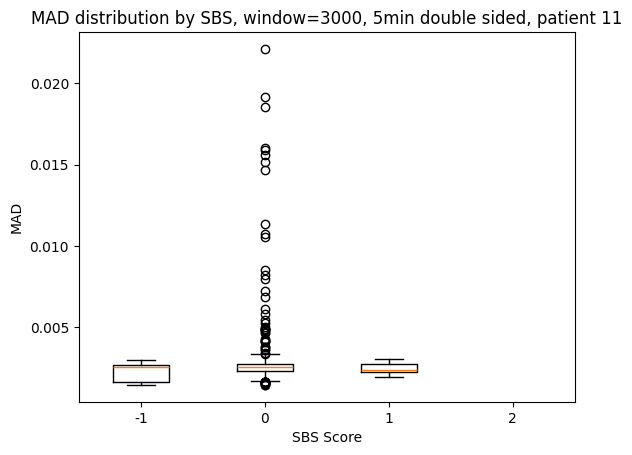

In [45]:
ax, sbs_mad_dict = sbs_boxplot(sbs, x_mag, window_size, show_outlier=True)

plt.title('MAD distribution by SBS, window=3000, 5min double sided, patient 11')
plt.show()

In [46]:
report_quartiles(sbs_mad_dict)

SBS Score: -1
Q1: 0.0016063572935696158
Q2 (Median): 0.0025232924976091864
Q3: 0.002661250190433284
90th Percentile: 0.0027384082411469057

SBS Score: 0
Q1: 0.002301743561107794
Q2 (Median): 0.0025396274236972327
Q3: 0.002730736596561145
90th Percentile: 0.003383521109093813

SBS Score: 1
Q1: 0.0022689305324544717
Q2 (Median): 0.002363734898528813
Q3: 0.002747150528462805
90th Percentile: 0.0027984912174611855

SBS Score: 2
Q1: nan
Q2 (Median): nan
Q3: nan
90th Percentile: nan



20


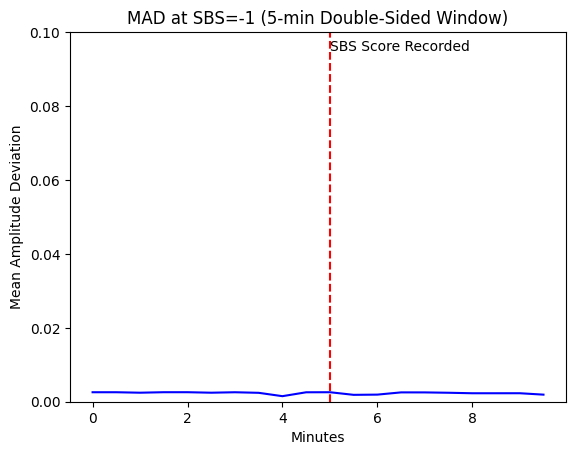

20


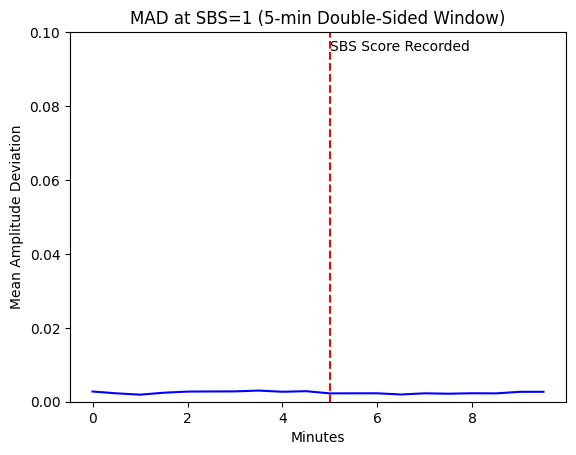

20


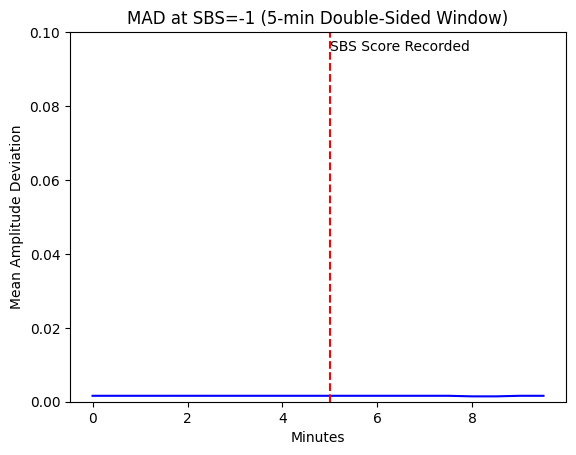

20


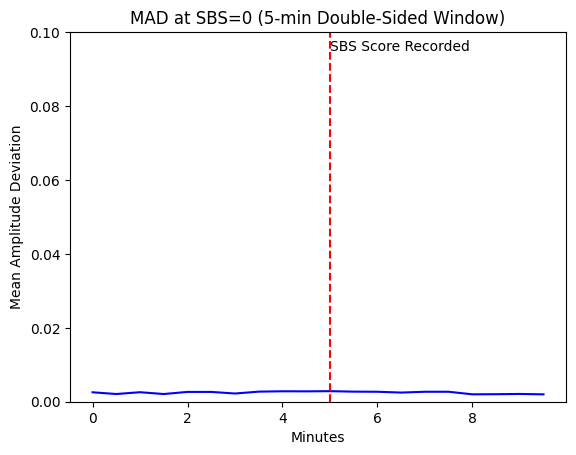

20


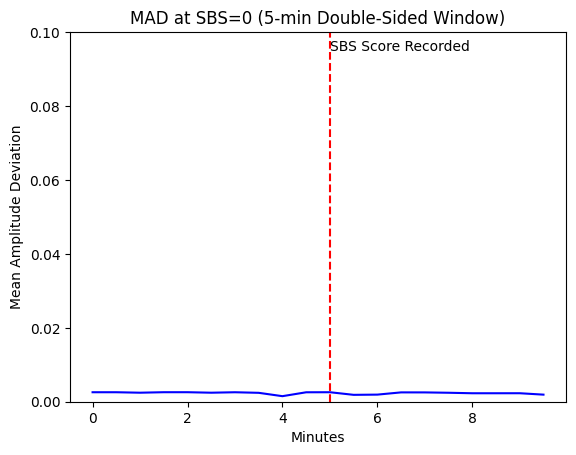

20


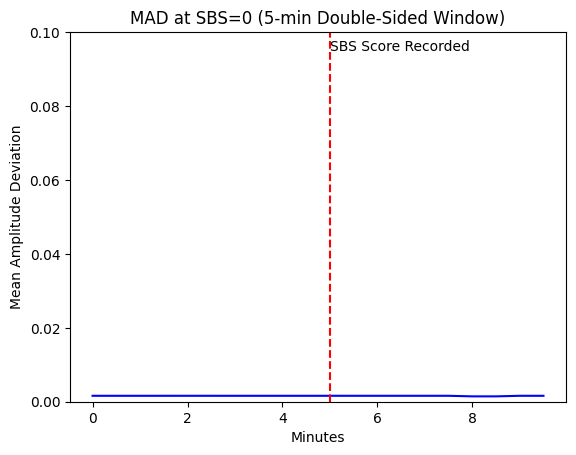

20


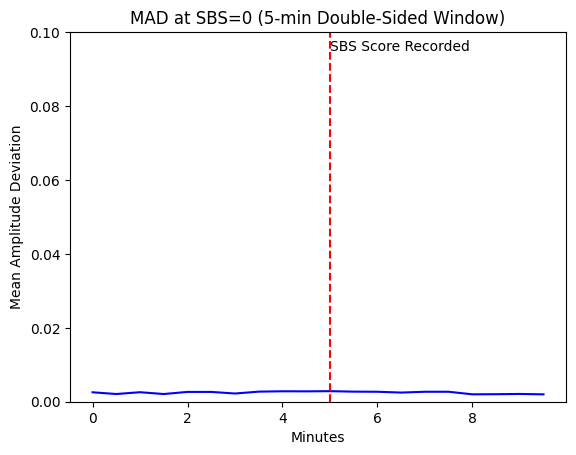

20


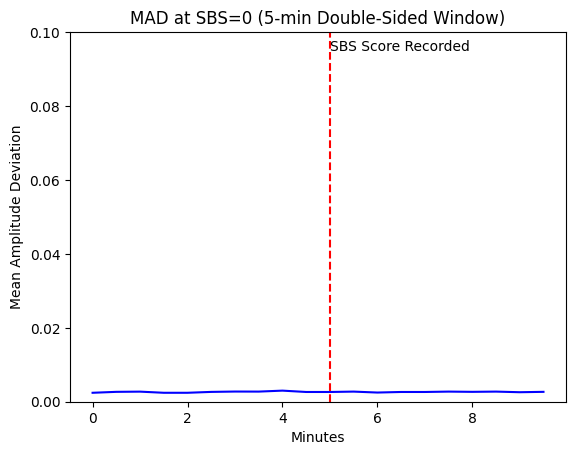

20


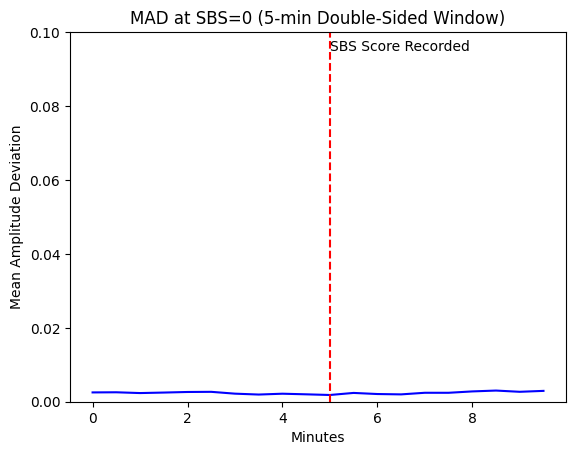

20


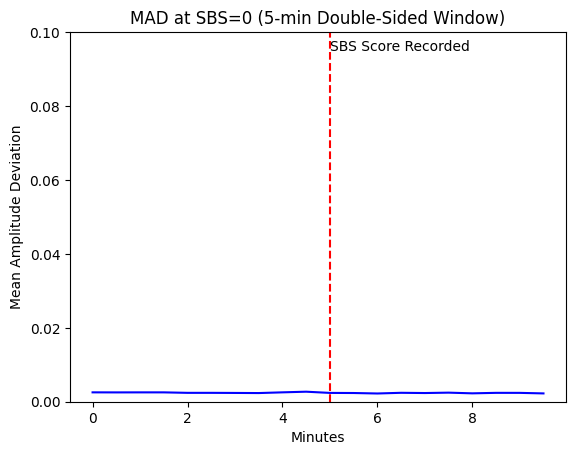

20


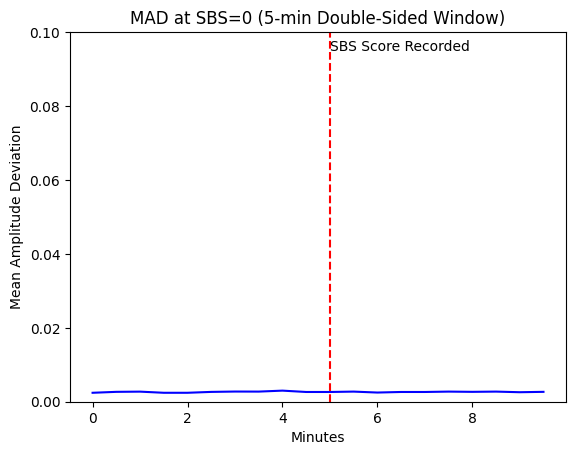

20


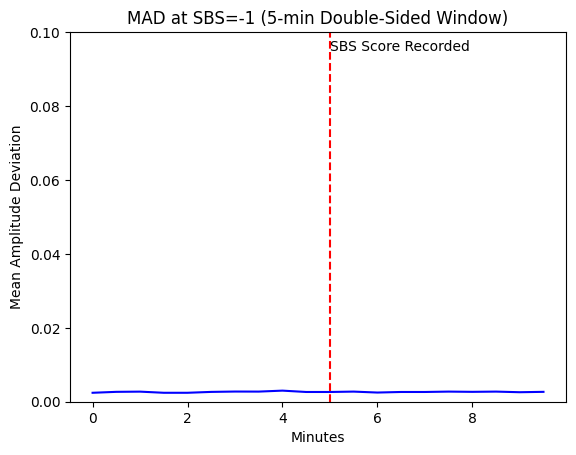

20


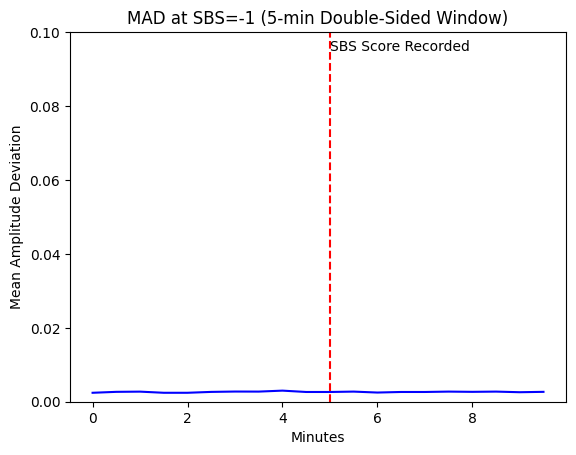

20


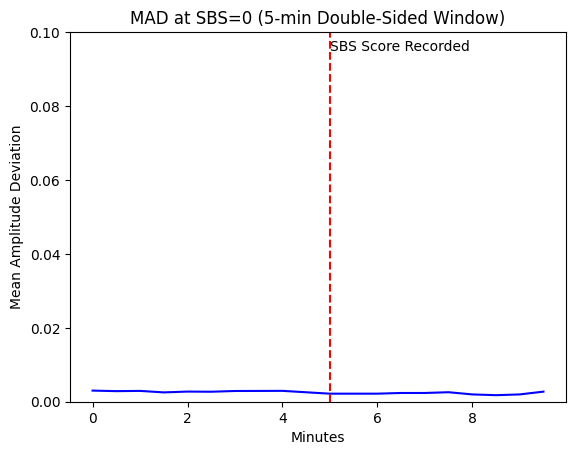

20


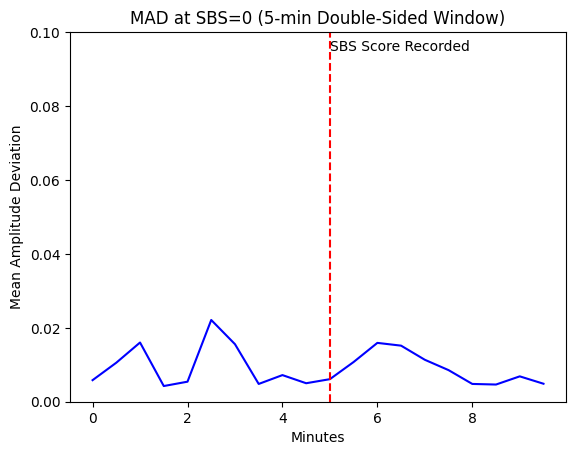

20


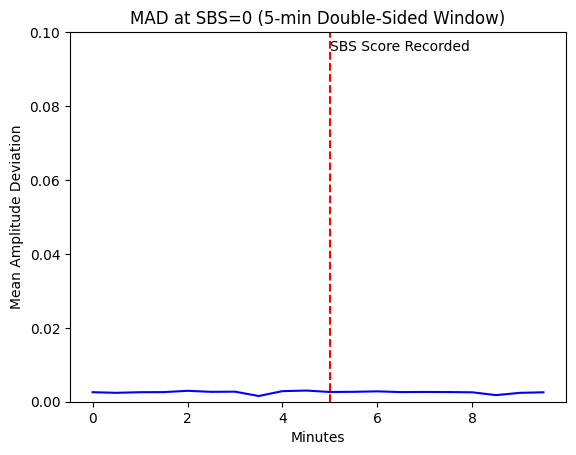

20


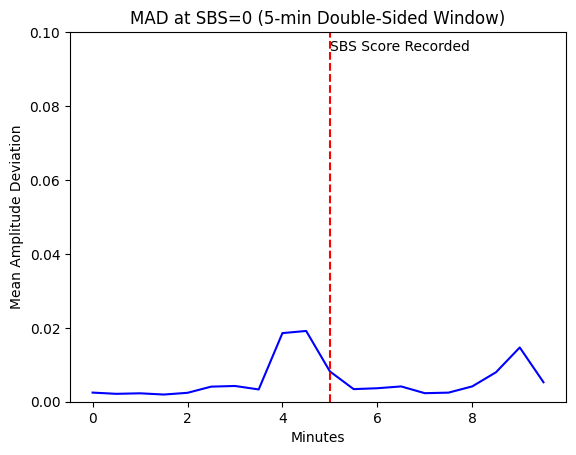

20


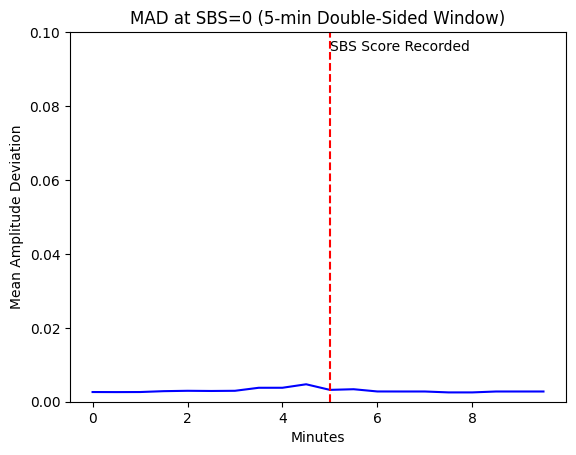

20


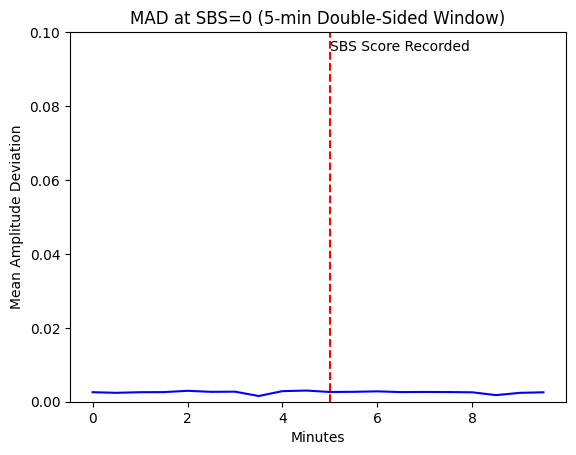

20


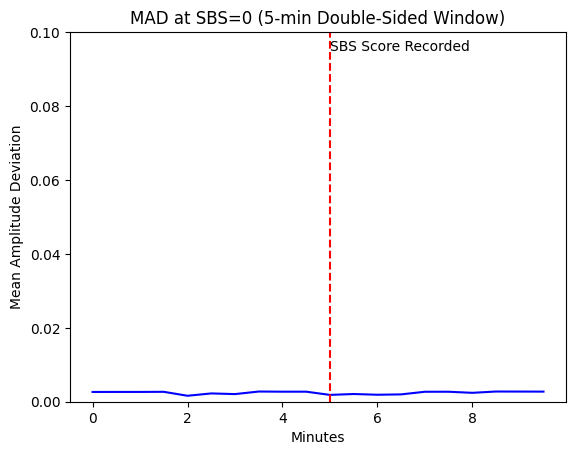

20


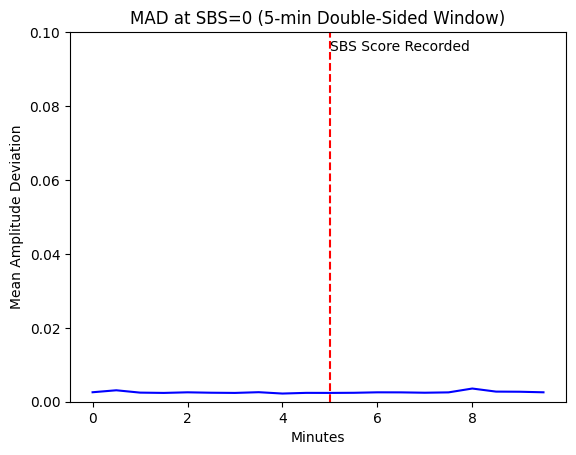

20


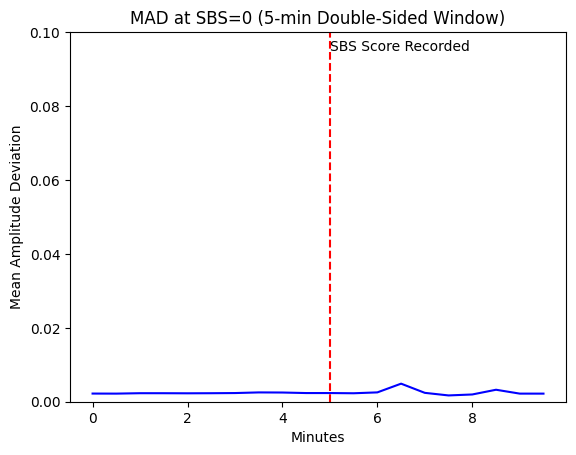

20


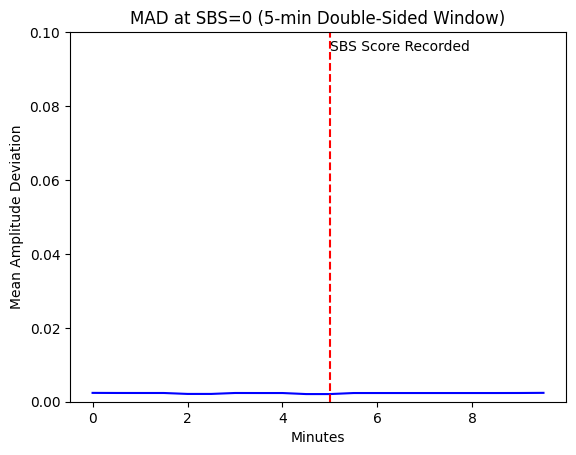

20


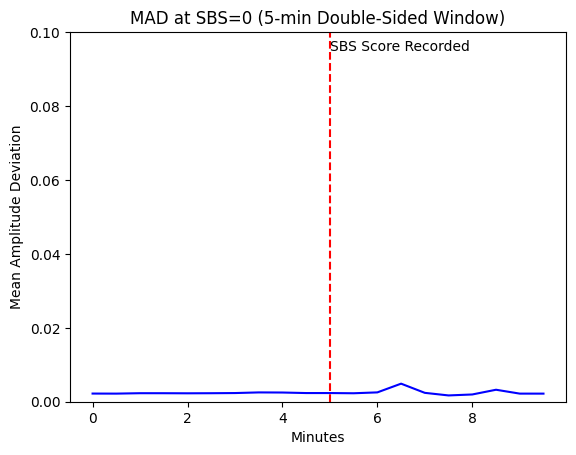

In [47]:
# Plot MAD against time
count = 0
# Print Graph per SBS
for i, sbs_value in enumerate(sbs):    
    signal = x_mag[i,:]
    signal_mad = Actigraph_Metrics.VecMag_MAD(signal, window_size)
    print(len(signal_mad))
    
    t = np.arange(0, len(signal), step=window_size) / (freq * 60)
    # Plot MAD against time
    plt.plot(t, signal_mad, color='blue')
    # SBS marker
    plt.axvline(t[len(t)//2], color='red', linestyle='--')
    plt.text(t[len(t)//2], 0.095, "SBS Score Recorded")

    plt.ylim(0, 0.1)
    plt.xlabel('Minutes')
    plt.ylabel('Mean Amplitude Deviation')    
    plt.title(f'MAD at SBS={sbs_value} (5-min Double-Sided Window)')
    
    # save plots
    # folder_path = './AnalysisResults/Patient11_5MIN_DSW_MAD'
    folder_path = r'C:\Users\sidha\OneDrive\Sid Stuff\PROJECTS\iMEDS Design Team\Data Analysis\PedAccel\data_analysis\PythonPipeline\PatientData\Patient11\AnalysisResults\Patient11_5MIN_DSW_MAD_30'
    if not os.path.isdir(folder_path):
        os.makedirs(folder_path)
    plt.savefig(os.path.join(folder_path, f'SBS_{sbs_value}_plot{count}.png'))
    count +=1
    
    plt.show()

10 Minute - 5 Minute Double-Sided Window

In [48]:
# TODO: CHANGE THESE PARAMS
# Set params
filename = 'Patient11_10MIN_5MIN_DSW_AllSBS.mat'
window_size = 3000 #100 is 1 second worth of time

# Run all the cells below

In [49]:
# Load 10-Min, 5-Min Double-Sided Window Data
data_path = os.path.join(data_dir, filename)
data = loadmat(data_path)
x_mag = data["x_mag"]
sbs = data["sbs"].flatten()

print(len(x_mag))
print(len(sbs))
print(len(x_mag[0]))

24
24
89899


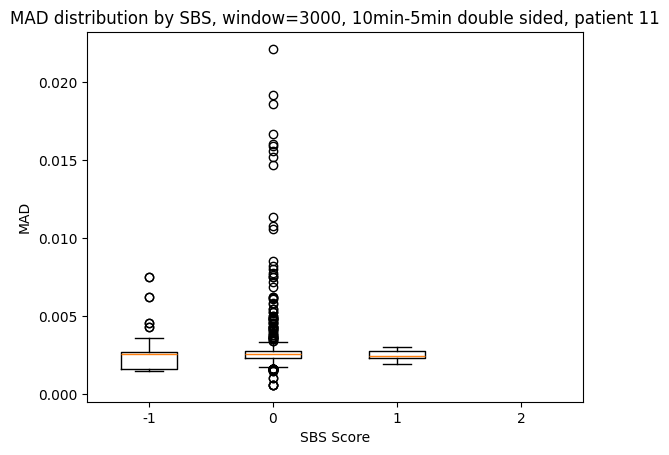

In [50]:
ax, sbs_mad_dict = sbs_boxplot(sbs, x_mag, window_size, show_outlier=True)

plt.title('MAD distribution by SBS, window=3000, 10min-5min double sided, patient 11')
plt.show()

In [51]:
report_quartiles(sbs_mad_dict)

SBS Score: -1
Q1: 0.0016063572935696158
Q2 (Median): 0.0025486779052241726
Q3: 0.0026718849628355745
90th Percentile: 0.00277772460467234

SBS Score: 0
Q1: 0.0022983899100450234
Q2 (Median): 0.0025383303665425516
Q3: 0.002729696087660688
90th Percentile: 0.0036618081024145073

SBS Score: 1
Q1: 0.0022759559808374075
Q2 (Median): 0.0024310556458477794
Q3: 0.0027311954064805355
90th Percentile: 0.00277977277931305

SBS Score: 2
Q1: nan
Q2 (Median): nan
Q3: nan
90th Percentile: nan



30


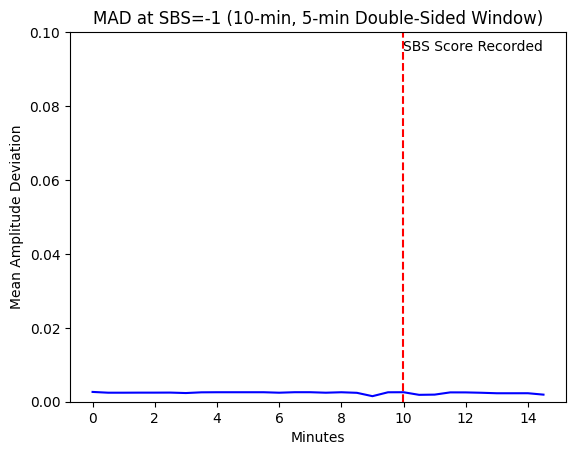

30


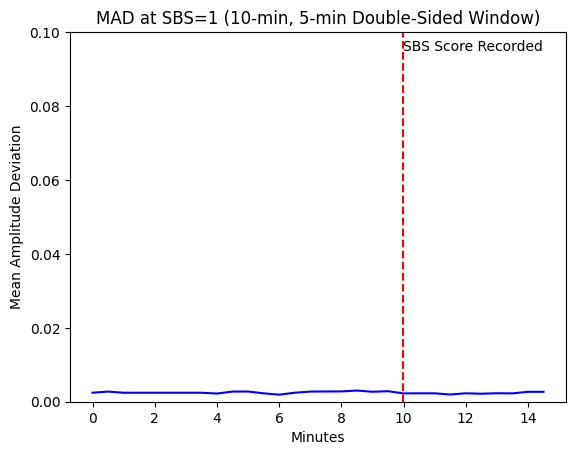

30


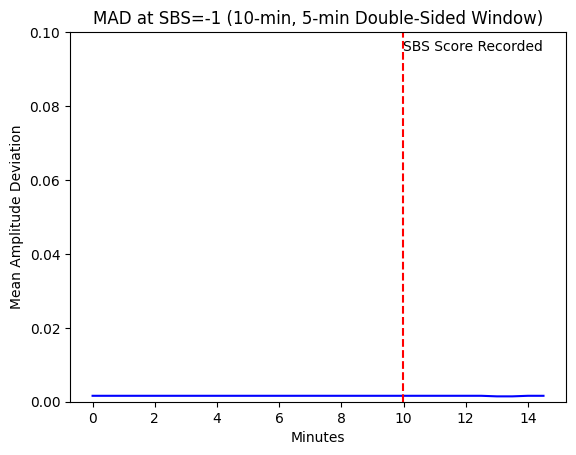

30


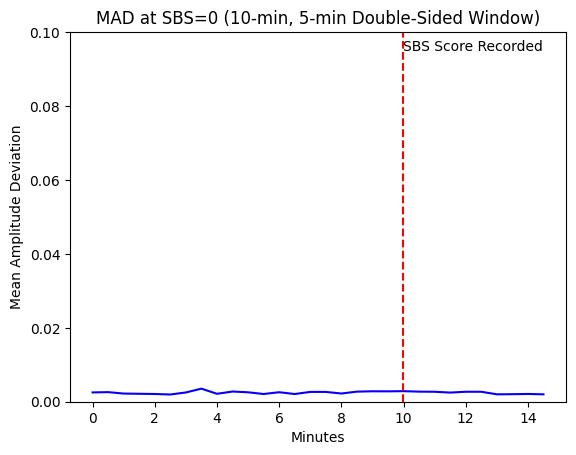

30


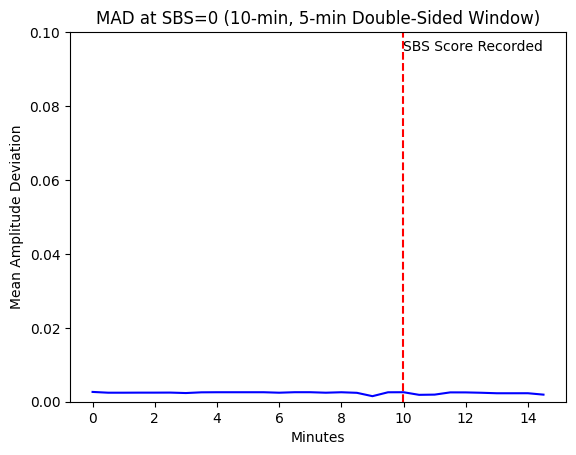

30


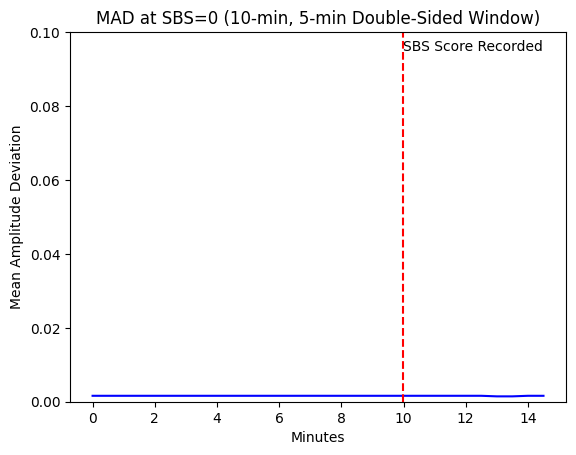

30


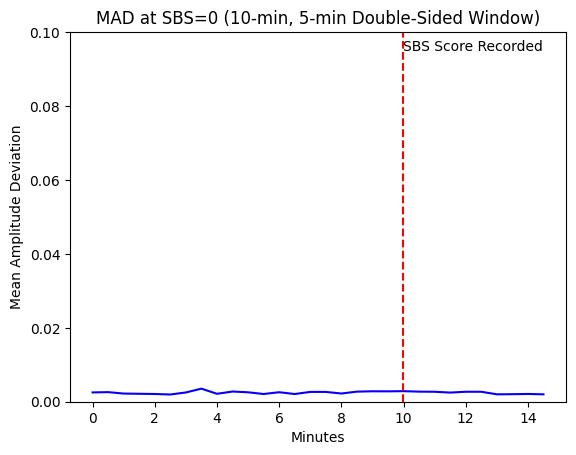

30


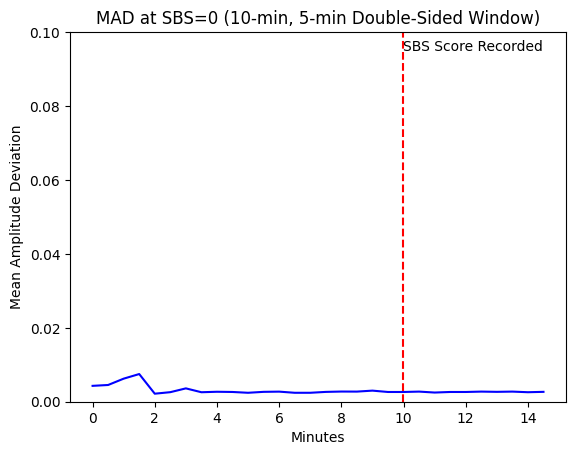

30


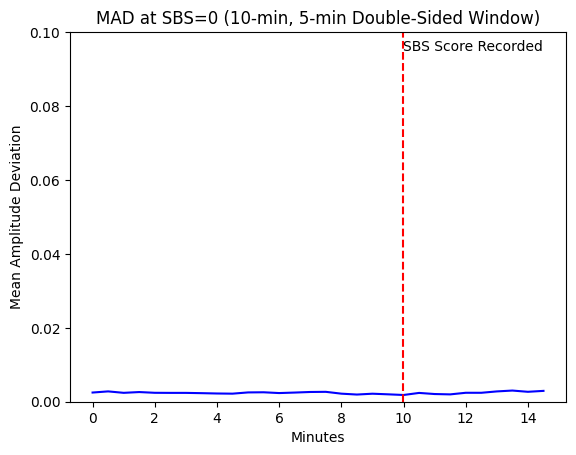

30


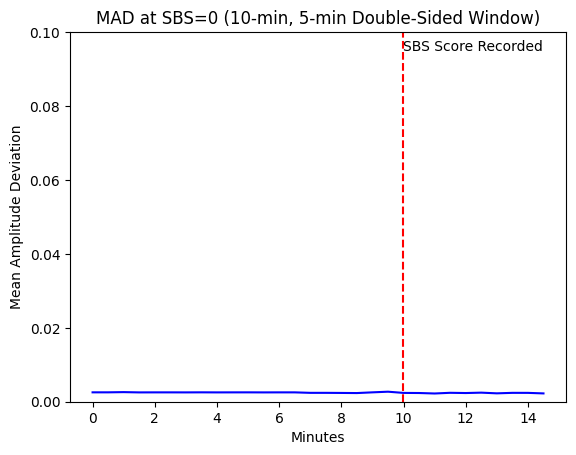

30


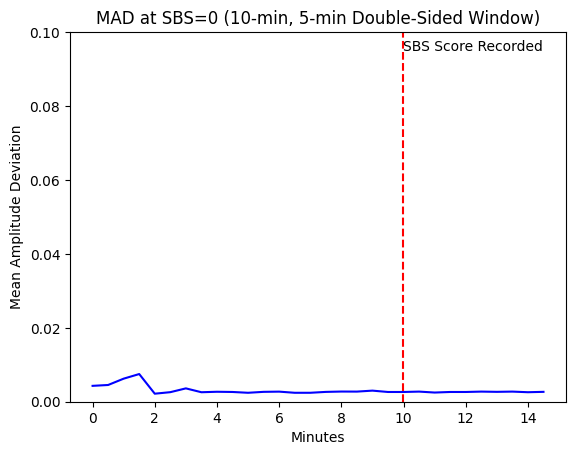

30


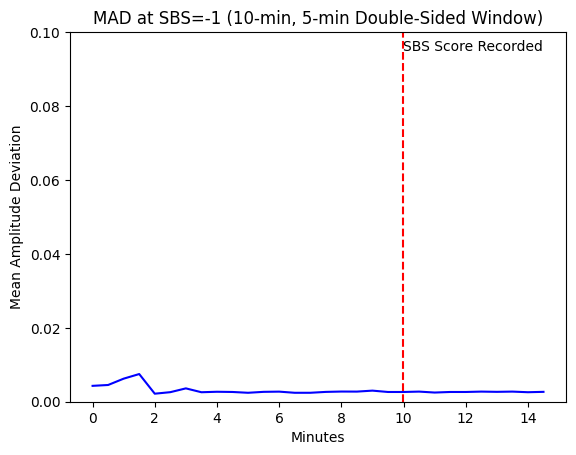

30


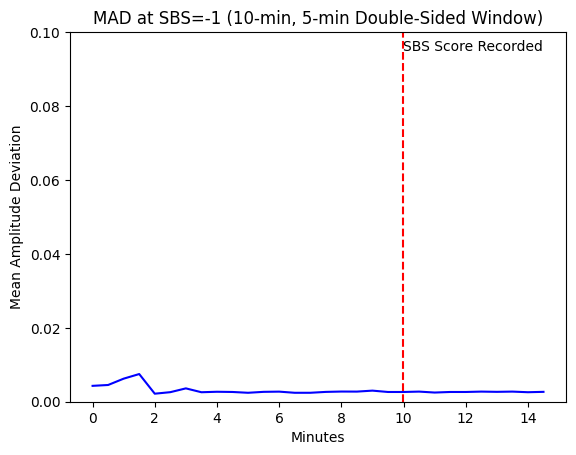

30


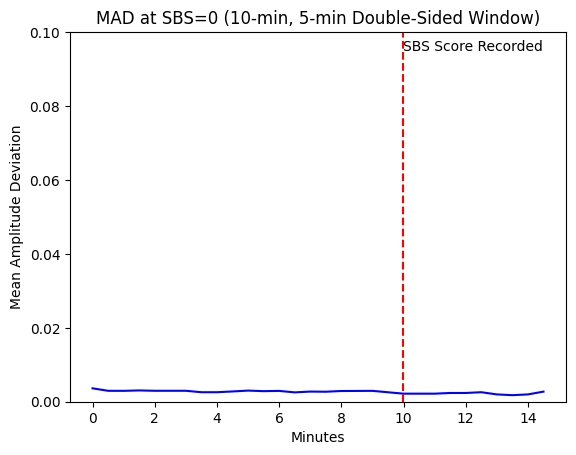

30


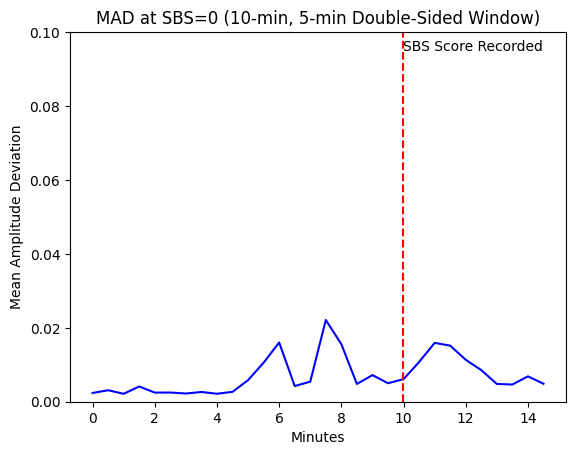

30


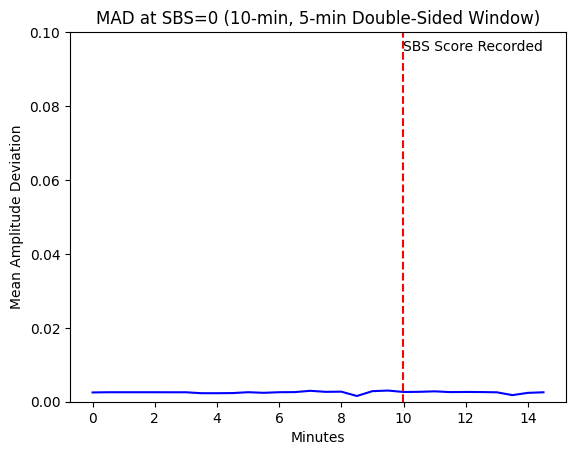

30


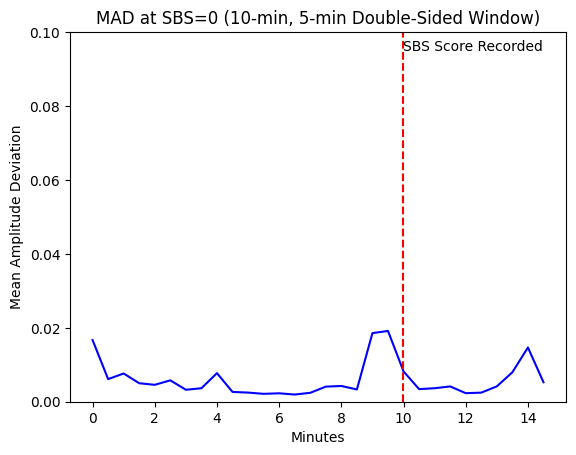

30


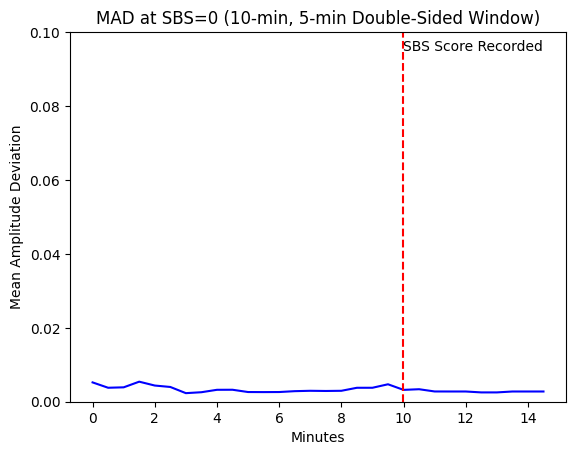

30


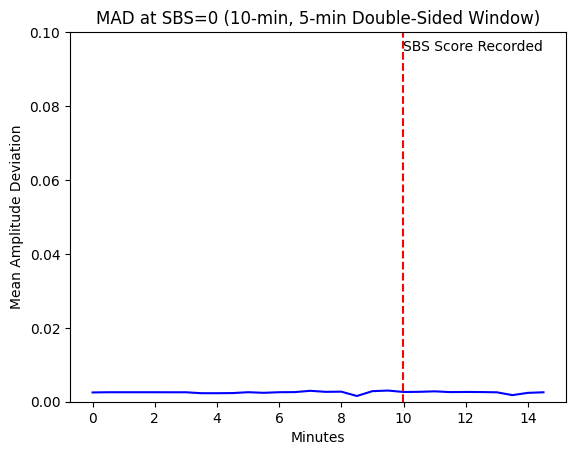

30


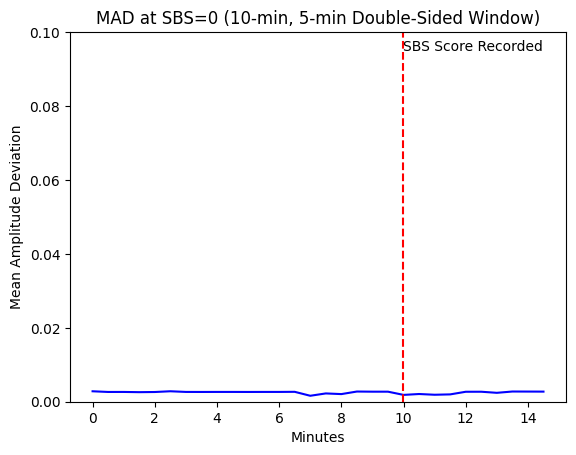

30


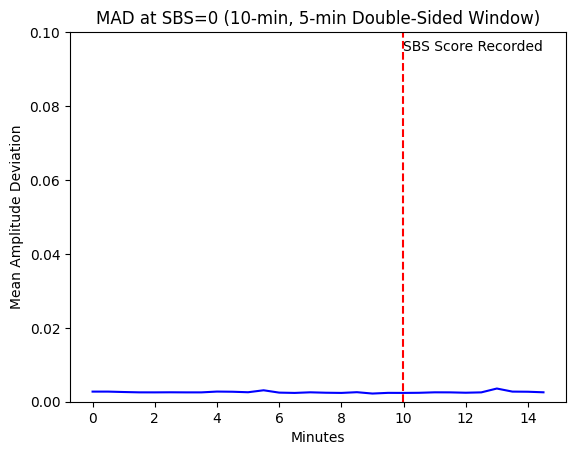

30


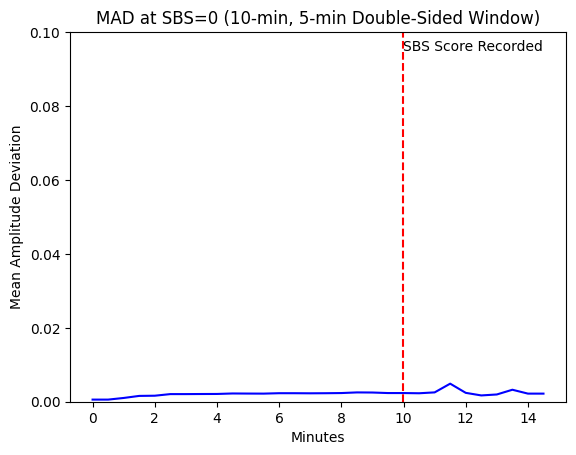

30


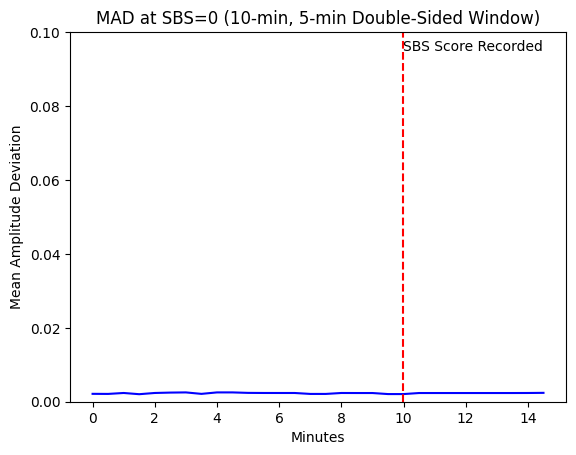

30


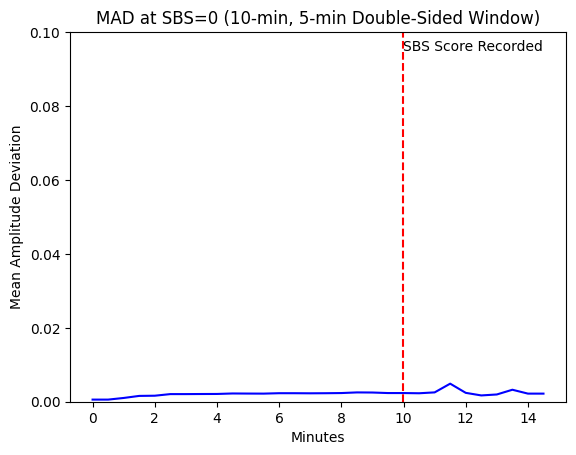

In [52]:
# Plot MAD against time
count = 0
# Print Graph per SBS
for i, sbs_value in enumerate(sbs):    
    signal = x_mag[i,:]
    signal_mad = Actigraph_Metrics.VecMag_MAD(signal, window_size)
    print(len(signal_mad))
    
    t = np.arange(0, len(signal), step=window_size) / (freq * 60)
    # Plot MAD against time
    plt.plot(t, signal_mad, color='blue')
    # SBS marker
    plt.axvline((t[len(t)//2]*1.33), color='red', linestyle='--')
    plt.text((t[len(t)//2]*1.33), 0.095, "SBS Score Recorded")

    plt.ylim(0, 0.1)
    plt.xlabel('Minutes')
    plt.ylabel('Mean Amplitude Deviation')    
    plt.title(f'MAD at SBS={sbs_value} (10-min, 5-min Double-Sided Window)')
    
    # save plots
    # folder_path = './AnalysisResults/Patient11_10MIN_5MIN_DSW_MAD'
    folder_path = r'C:\Users\sidha\OneDrive\Sid Stuff\PROJECTS\iMEDS Design Team\Data Analysis\PedAccel\data_analysis\PythonPipeline\PatientData\Patient11\AnalysisResults\Patient11_10MIN_5MIN_DSW_MAD_30'
    if not os.path.isdir(folder_path):
        os.makedirs(folder_path)
    plt.savefig(os.path.join(folder_path, f'SBS_{sbs_value}_plot{count}.png'))
    count +=1
    
    plt.show()

15 Minute - 5 Minute Double-Sided

In [53]:
# TODO: CHANGE THESE PARAMS
# Set params
filename = 'Patient11_15MIN_5MIN_DSW_AllSBS.mat'
window_size = 3000 #100 is 1 second worth of time

# Run all the cells below

In [54]:
# Load 10-Min, 5-Min Double-Sided Window Data
data_path = os.path.join(data_dir, filename)
data = loadmat(data_path)
x_mag = data["x_mag"]
sbs = data["sbs"].flatten()

print(len(x_mag))
print(len(sbs))
print(len(x_mag[0]))

24
24
119899


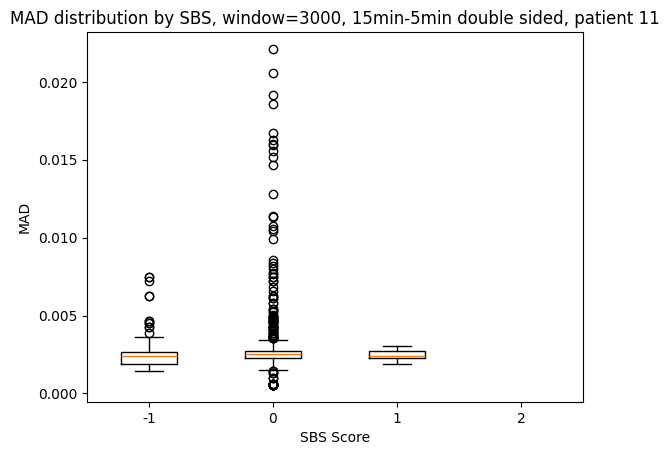

In [55]:
ax, sbs_mad_dict = sbs_boxplot(sbs, x_mag, window_size, show_outlier=True)

plt.title('MAD distribution by SBS, window=3000, 15min-5min double sided, patient 11')
plt.show()

In [56]:
report_quartiles(sbs_mad_dict)

SBS Score: -1
Q1: 0.001902313421010715
Q2 (Median): 0.0024194051045154374
Q3: 0.002637261040286387
90th Percentile: 0.0027777246046723366

SBS Score: 0
Q1: 0.0022436208237304467
Q2 (Median): 0.002530393987699442
Q3: 0.00273906926492562
90th Percentile: 0.0036122930510295026

SBS Score: 1
Q1: 0.0022759559808374075
Q2 (Median): 0.0024310556458477794
Q3: 0.0026991816017256087
90th Percentile: 0.0027628244730019346

SBS Score: 2
Q1: nan
Q2 (Median): nan
Q3: nan
90th Percentile: nan



40


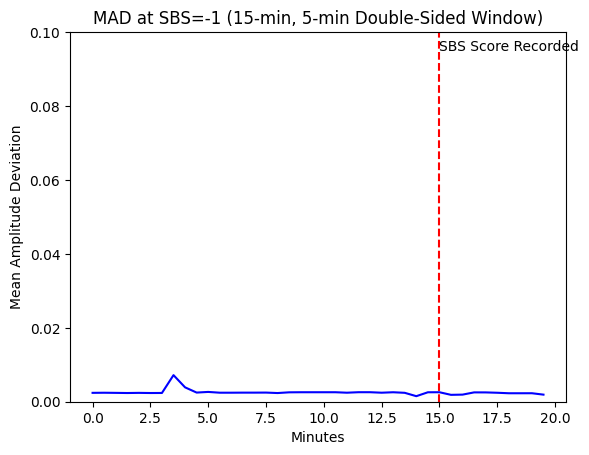

40


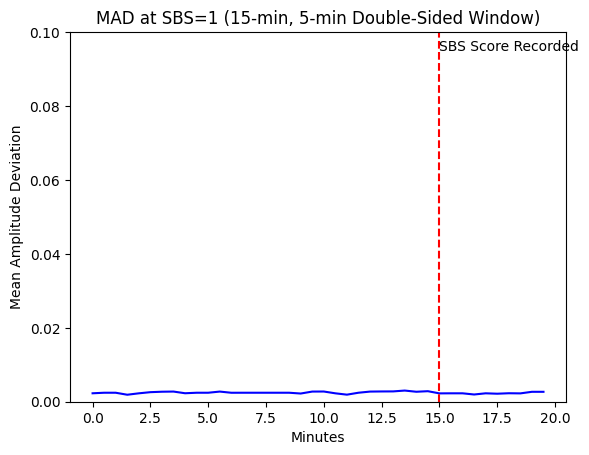

40


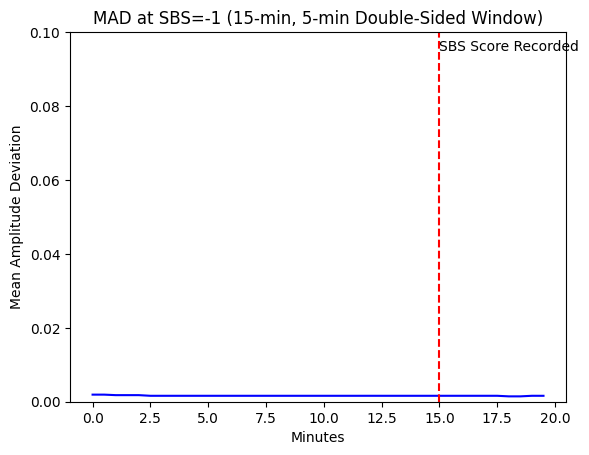

40


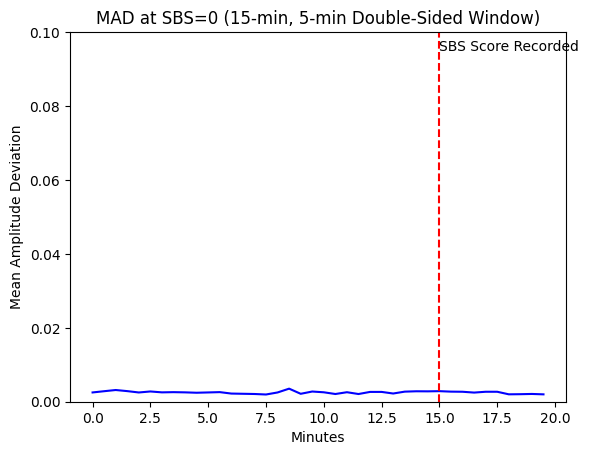

40


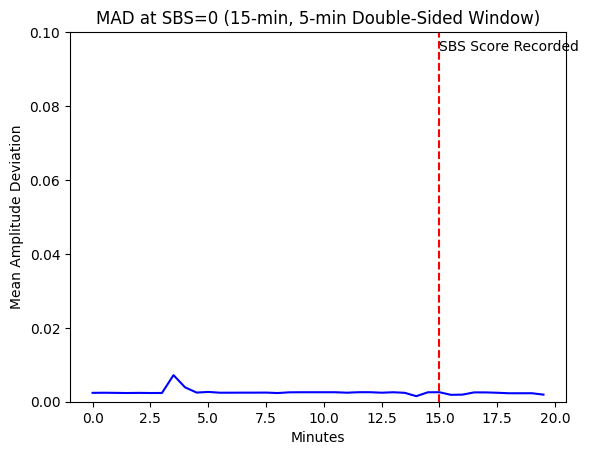

40


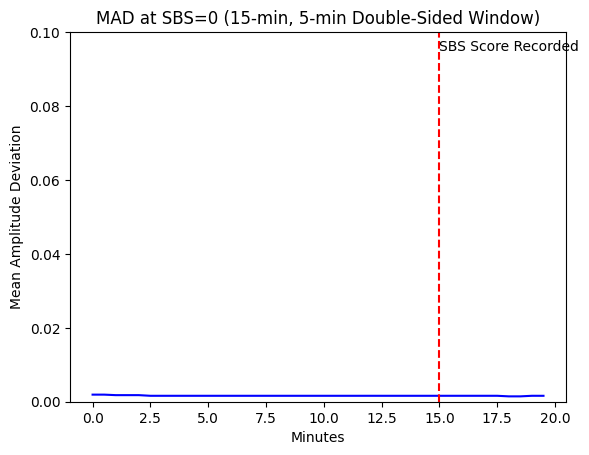

40


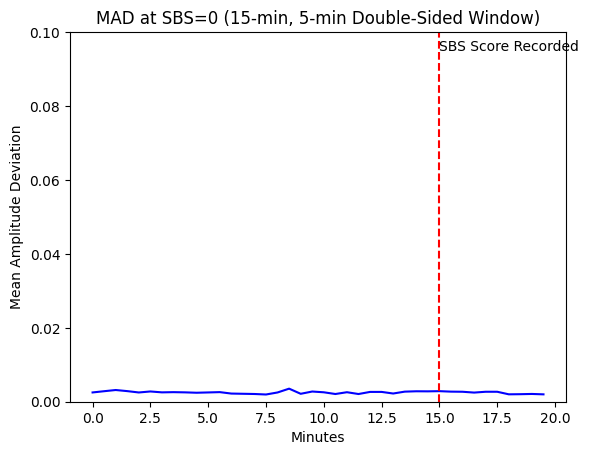

40


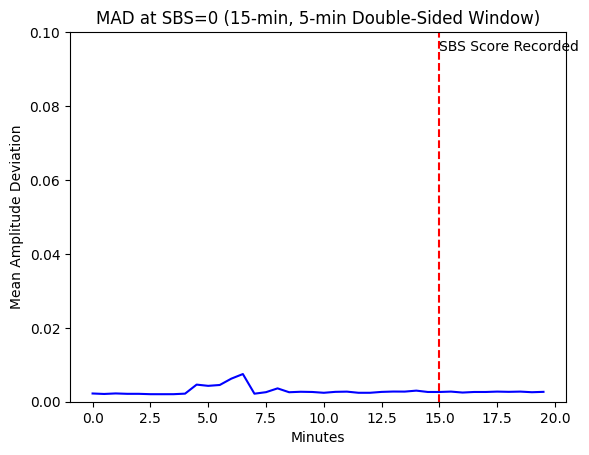

40


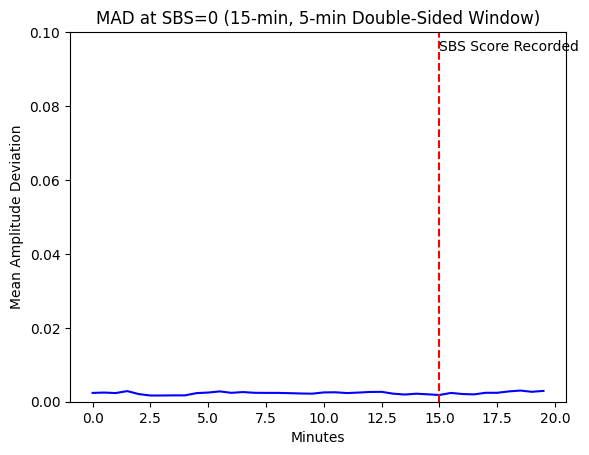

40


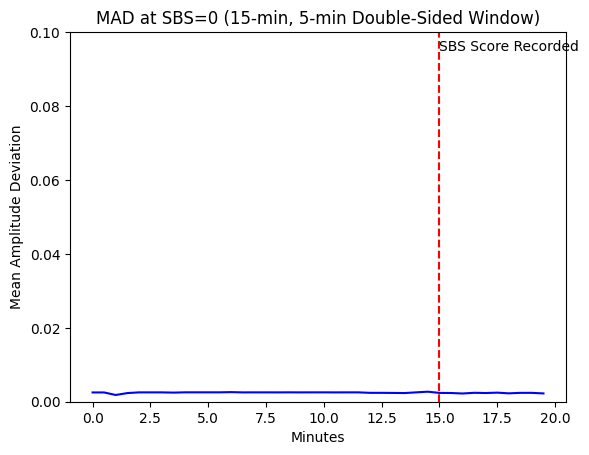

40


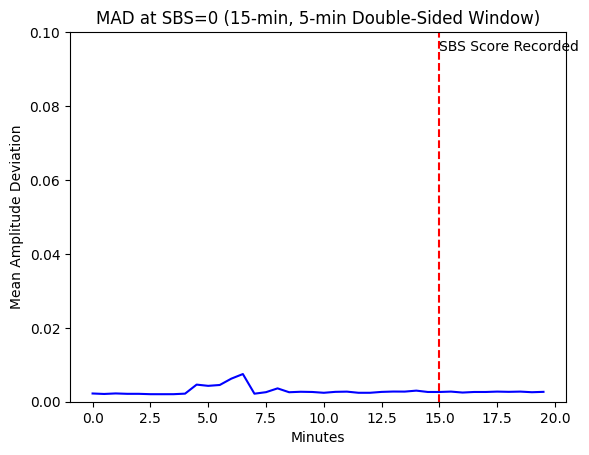

40


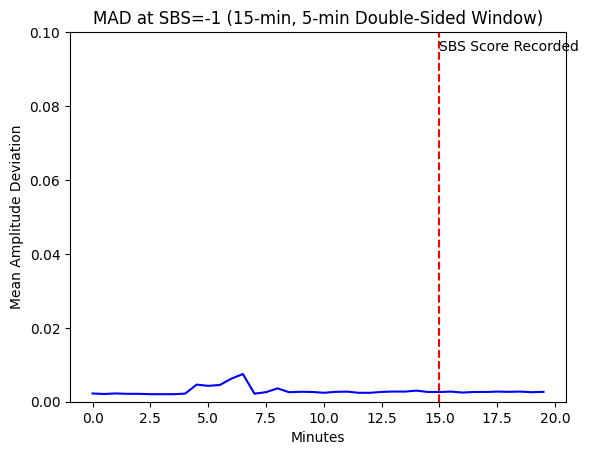

40


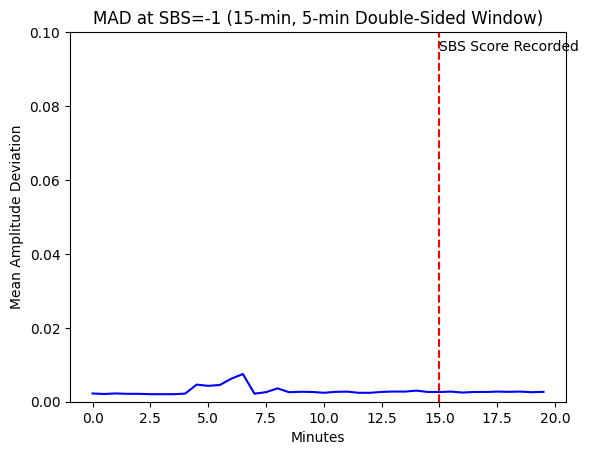

40


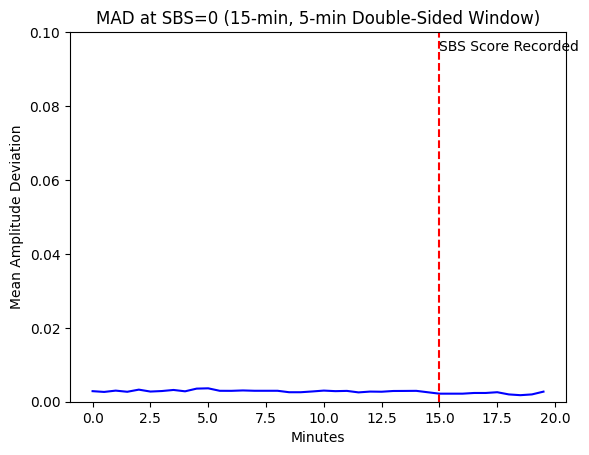

40


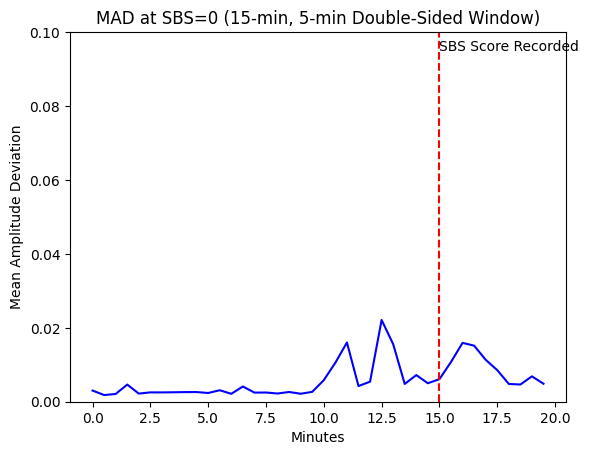

40


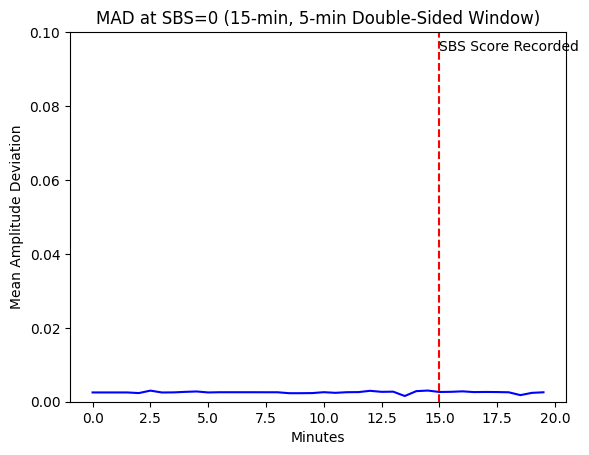

40


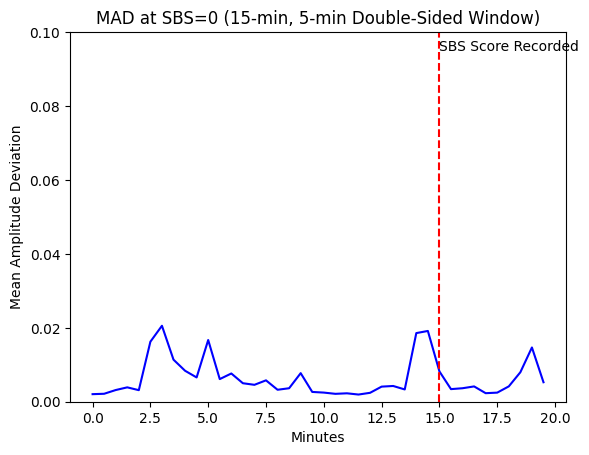

40


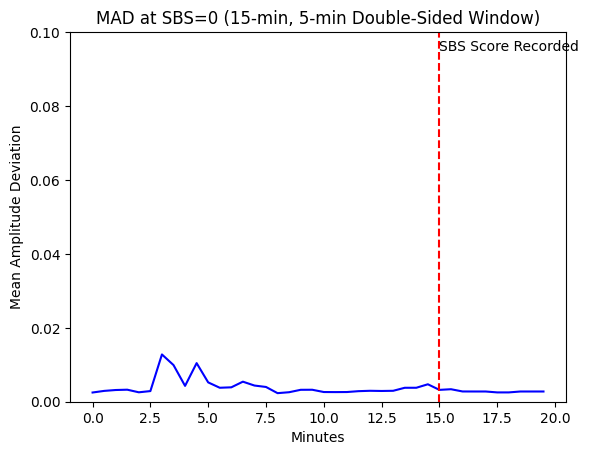

40


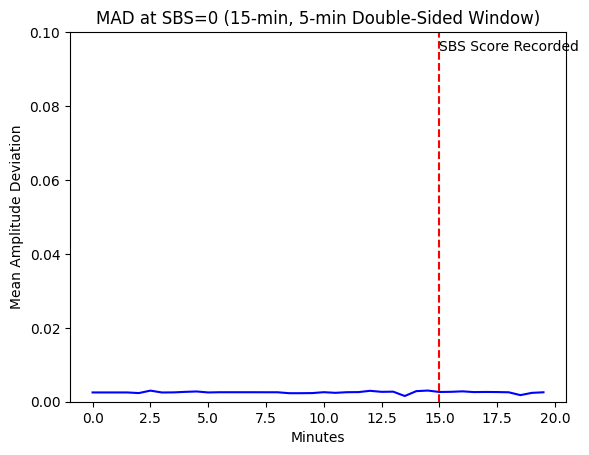

40


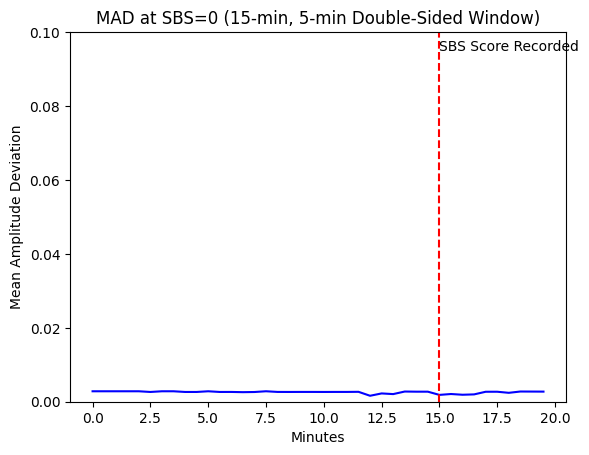

40


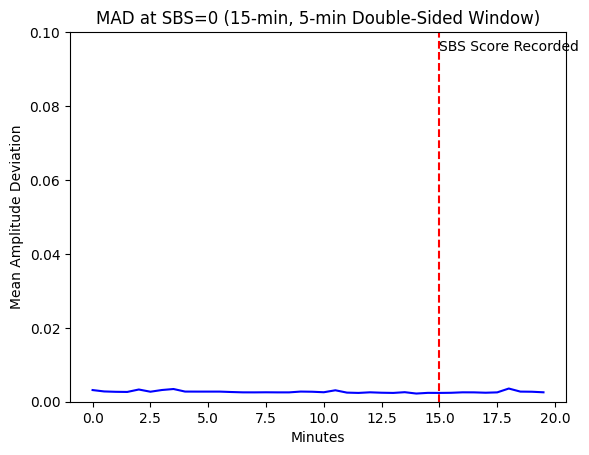

40


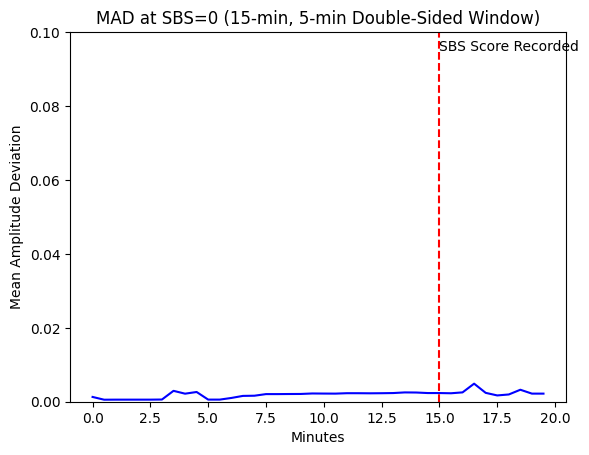

40


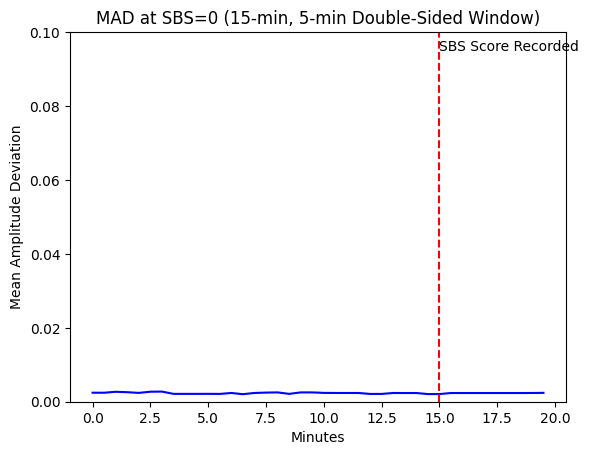

40


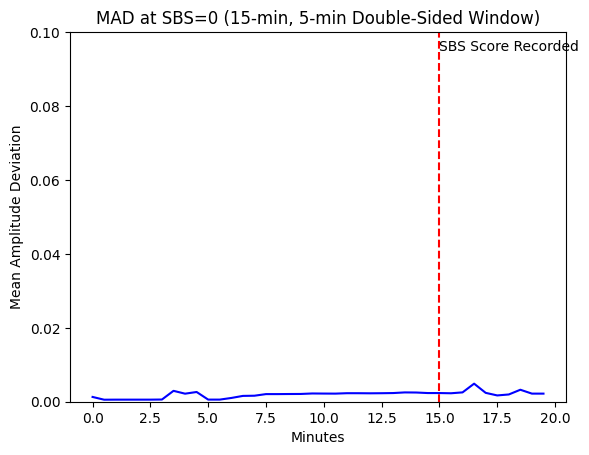

In [57]:
# Plot MAD against time
count = 0
# Print Graph per SBS
for i, sbs_value in enumerate(sbs):    
    signal = x_mag[i,:]
    signal_mad = Actigraph_Metrics.VecMag_MAD(signal, window_size)
    print(len(signal_mad))
    
    t = np.arange(0, len(signal), step=window_size) / (freq * 60)
    # Plot MAD against time
    plt.plot(t, signal_mad, color='blue')
    # SBS marker
    plt.axvline((t[len(t)//2]*1.5), color='red', linestyle='--')
    plt.text((t[len(t)//2]*1.5), 0.095, "SBS Score Recorded")

    plt.ylim(0, 0.1)
    plt.xlabel('Minutes')
    plt.ylabel('Mean Amplitude Deviation')    
    plt.title(f'MAD at SBS={sbs_value} (15-min, 5-min Double-Sided Window)')
    
    # save plots
    # folder_path = './AnalysisResults/Patient11_15MIN_5MIN_DSW_MAD'
    folder_path = r'C:\Users\sidha\OneDrive\Sid Stuff\PROJECTS\iMEDS Design Team\Data Analysis\PedAccel\data_analysis\PythonPipeline\PatientData\Patient11\AnalysisResults\Patient11_15MIN_5MIN_DSW_MAD_30'
    if not os.path.isdir(folder_path):
        os.makedirs(folder_path)
    plt.savefig(os.path.join(folder_path, f'SBS_{sbs_value}_plot{count}.png'))
    count +=1
    
    plt.show()